In [1]:
import pandas as pd

# Load the CSV file
file_path = "C:\\Users\\pattnaik\\Desktop\\Prodigy InfoTech Internship\\datasets\\twitter_training.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [2]:
import pandas as pd

# Sample a smaller subset of the data for quicker processing
sampled_data = data.sample(n=1000, random_state=1)

# Display the first few rows of the sampled data
sampled_data.head()


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
85,2415,Borderlands,Positive,FUCK YESSSSSSSS.
36834,8319,Microsoft,Negative,Why are people talking about Microsoft buying ...
69253,3864,Cyberpunk2077,Positive,Enjoy a dystopian corporate future with a refr...
47868,5818,HomeDepot,Positive,Some milestones and anniversaries here at Chic...
28917,575,ApexLegends,Positive,The Hemlok Emperor is becoming an almost absol...


In [3]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [4]:
import nltk

# Download the necessary NLTK corpora
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pattnaik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pattnaik\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
from textblob import TextBlob

text = "TextBlob is amazingly simple to use. What great fun!"
blob = TextBlob(text)

print(blob.sentiment)

Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)


In [8]:
# Print the column names to confirm
print(data.columns)

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [9]:
# Rename columns for clarity (based on the initial column inspection)
data.columns = ['ID', 'Category', 'Sentiment', 'Tweet']

In [12]:
print(data.head())

     ID     Category Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               Tweet  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [14]:
#filtering
# Ensure all entries in 'Tweet' are strings
data = data[data['Tweet'].apply(lambda x: isinstance(x, str))]

# Sample a smaller subset of the data
sampled_data = data.sample(n=1000, random_state=1)

In [15]:
from textblob import TextBlob

# Function to get the polarity of the tweet
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to get sentiment scores
sampled_data['Polarity'] = sampled_data['Tweet'].apply(get_polarity)

# Function to categorize polarity
def get_analysis(score):
    if score > 0:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Add analysis to the dataframe
sampled_data['Analysis'] = sampled_data['Polarity'].apply(get_analysis)


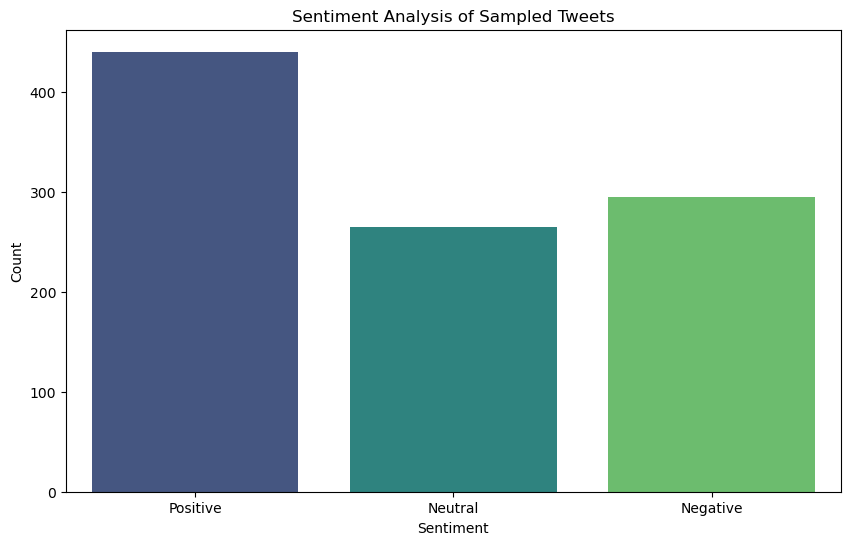

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the sentiment
plt.figure(figsize=(10,6))
sns.countplot(x='Analysis', data=sampled_data, palette='viridis')
plt.title('Sentiment Analysis of Sampled Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
